# Convert CRY files to RGB

Convert cry files to rgb arrays that we can use to create and extract images.

In [1]:
CRY_RGB = [
[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113, 85],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]
    ],
[
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255]
],
[
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113,85],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
]

In [239]:
import math
from PIL import Image, ImageColor
import numpy as np

def saturate(c,intensity):
    # Modify them using the intensity value
    c = c * (intensity / 255.0)
    c = math.ceil(c+0.5)
    # Clamp the value between 0 and 255
    return max(0, min(c,255))
    
def cry_to_rgb(d):
    # For example value of d: 0x1A20
    intensity = d & 0xFF   # get the intensity: 0x20
    cr1 = (d >> 12) & 0xF  # get index 1: 0x0A (10)
    cr2 = (d >> 8) & 0xF   # get index 2: 0x01 (1)
    
    # Use the indices to get the RGB values from our
    # lookup table
    r = CRY_RGB[0][cr1][cr2]
    g = CRY_RGB[1][cr1][cr2]
    b = CRY_RGB[2][cr1][cr2]

    # Ensure we get a valid rgb value between 0 and 255
    r1 = saturate(r, intensity)
    g1 = saturate(g, intensity)
    b1 = saturate(b, intensity)

    return (r1,g1,b1)

def getPixels(file_name,width=2,offset=0):
    cry_pixels = open(file_name,'rb').read()
    rgb_pixels = []
    for i in range(offset, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    print(len(pixels))
    pixels.shape = (-1,width,3)
    return pixels

320


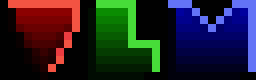

In [240]:
width = int(320/10)
scale = 8
pixels = getPixels('../src/vlm/images/vlmlogo.cry',width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

In [238]:
!wc -c ../src/vlm/images/vlmlogo.cry

640 ../src/vlm/images/vlmlogo.cry


2244


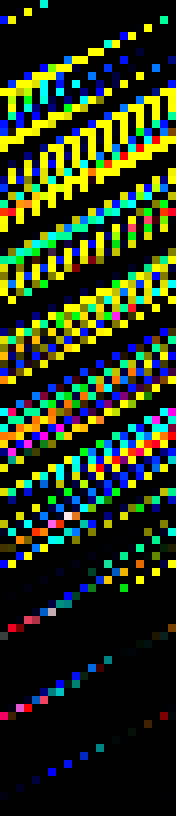

In [244]:
width = 22
pixels = getPixels('../src/vlm/images/jaglogo.cry',width,4)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

1122


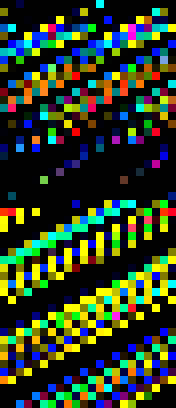

In [245]:
width = 22
pixels = getPixels('../src/vlm/images/jlogo2.cry',width,4)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

318


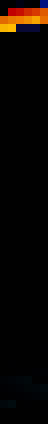

In [246]:
width = 6
pixels = getPixels('../src/images/arrow.cry',width,4)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

In [248]:
def getDivisors(n):
    for i in range(1,880):
        if n % i == 0:
            print(i)

1
2
4
8
433
866
3464


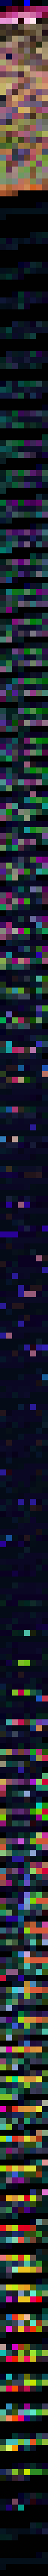

In [251]:
getDivisors(3464)
width = 8
pixels = getPixels('../src/images/cd1.cry',width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

1
2
4
8
16
251
502
4016


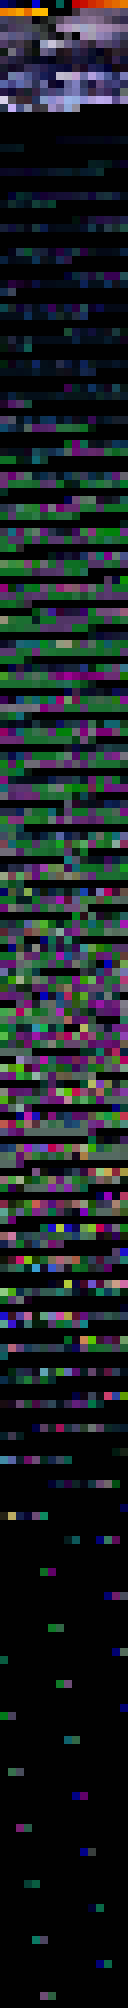

In [258]:
getDivisors(4016)
width = 16
pixels = getPixels('../src/images/cdback.cry',width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

In [16]:
from ascii_magic import AsciiArt
from PIL import Image
width = int(320/10)
pixels = getPixels('../src/vlm/images/vlmlogo.cry')
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)
my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=120, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))


;    /J############################TTTJx      _36FFFFFFFFFFFFFFF6j              /#TTTTTTTTTj`                 =#TTTTTTuuuu
;    ;]!?[tttttttttttttttttttttttttoTTJx    . _uJJJJJJJJJJJJJJ5F6j              ;!??!]]]!!!?)"|=          ."|">]!!!]]!zuuu
;        ,)||||||||||||||||||||||||%TTJx   ```_{I}}}}}}}}}}}}?2F6j                  -:::''';u#J1          `u#Jt'''::::[nuu
;     .. ;||||||||||||||||||||||||"%TTJx   ```_r*{{{{{{{{{{{{I2F6j                  -::::::,ivv%{s*"   i{ssvvv<:::::::[nuu
;     .. ,""""""""""""""""""""""""/vTTJx   ```_lssssssssssssr*2F6j                  -:::::::'__|TnTc...[Tnj:__'::::::'[nuu
;     .. :+==+//////////////////^^^)J#Jc   ```_xcccccccccccccr2F6j                  -'''''''''':===l7o7>==='''''''''''[nuu
;     .. _;;;=+==+++++++++++===+\\\vt1a>   ```_vxxxxxxxxxxxx%l2F6j                  `''''''''''____ieta/___''''''''''_[nuu
;         ...:;;;^==========;;,=e7z}       ```_)iiiiiiiiiiiiix3F6z                  `_________________________________[nuu
;         ...',,

In [272]:
0x34d8 - 0x188a

7246

In [271]:
0x44b6 - 0x34d8

4062

In [274]:
1024*6

6144

In [273]:
0x57aa - 0x44b6

4852

In [265]:
from ascii_magic import AsciiArt
from PIL import Image

img = Image.open('6.png','r')
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)
my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=50, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))


;                                                   
;                                                   
;        ....................................-`     
;       .,;;;;;;;;;;;;;;;;;;;;;;;;,,,,+v1tT#TFc     
;       .,;;;;;;;;;;;;;;;;;;;;;;;/%[7f5worr)|+      
;       .,;;;;;;;;;;;;;;;;;;;;i]25we*)=;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;ce2F7r^;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;=vjFp1%^;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;%LSf1);;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;/[CSt);;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;+?wq#r=;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;"!y5yl/;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,iuhus=;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       'wSt\;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       `)^;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;,